In [1]:
import sys
sys.path.append('../utils')
sys.path.append('../core')
sys.path.append('../')
import numpy as np
import scipy
import tqdm
import utils
import geometry
from core import *

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import glob

# from midvoxio.voxio import vox_to_arr

In [2]:
test_experiment = experiment.Experiment.load('../experiment_files/cardiac_3D_TTE')
test_experiment.run(dry=True)

dry run of simulation


  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:01<00:00,  2.39it/s]


In [3]:
test_experiment.run(repeat=False)

Found no more simulations to run.


In [4]:
test_experiment.add_results()

In [5]:
test_reconstruction = reconstruction.DAS(experiment=test_experiment)

In [6]:
image = test_reconstruction.get_image(dimensions=3, matsize=128, downsample=0.1, workers=4, tgc=7)

100%|██████████| 4096/4096 [00:21<00:00, 189.75it/s]
4it [02:17, 34.45s/it]


In [10]:
signals = test_reconstruction.get_signals(dimensions=3, matsize=128, downsample=0.1, workers=4, tgc=7)

100%|██████████| 4096/4096 [00:21<00:00, 188.66it/s]
4it [01:51, 27.83s/it]


In [8]:
assert False

AssertionError: 

In [15]:
image_zero = np.where(np.isnan(image), 0, image)
utils.save_mrc(image_zero, 'cardiac_3d_image.mrc')

In [ ]:
signals[3].shape

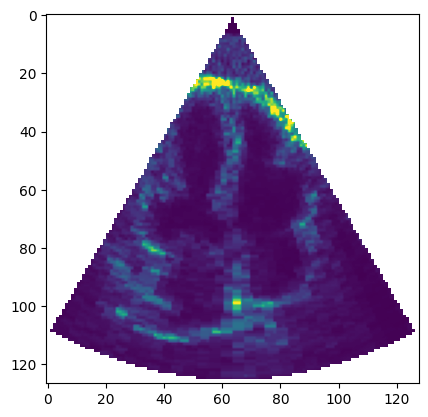

In [14]:
plt.imshow(signals[0][:,:,64], vmax=50000)

In [ ]:
signals_zero = np.where(np.isnan(signals), 0, signals)
utils.save_mrc(signals_zero, 'cardiac_3d_signals.mrc')

In [ ]:
signals_zero.shape

In [ ]:
plt.imshow(signals[0], vmin=0, vmax=12000, cmap='gray')
plt.gca().set_facecolor('k')

In [ ]:
plt.imshow(signals[1], vmin=0, vmax=12000, cmap='gray')
plt.gca().set_facecolor('k')

In [ ]:
plt.imshow(signals[2], vmin=0, vmax=12000, cmap='gray')
plt.gca().set_facecolor('k')

In [ ]:
plt.imshow(signals[3], vmin=0, vmax=12000, cmap='gray')
plt.gca().set_facecolor('k')

In [ ]:
plt.imshow(signals[4], vmin=0, vmax=12000, cmap='gray')
plt.gca().set_facecolor('k')

In [ ]:
plt.imshow(signals[5], vmin=0, vmax=12000, cmap='gray')
plt.gca().set_facecolor('k')

In [ ]:
plt.imshow(signals[6], vmin=0, vmax=12000, cmap='gray')
plt.gca().set_facecolor('k')

In [ ]:
image = np.where(np.isnan(image), 0, image)

In [ ]:
np.sum(image)

In [ ]:
utils.save_mrc(image, '../experiment_files/cardiac_experiment_04/image.mrc')

In [ ]:
X = np.linspace(-1, 1, 256)
Y = np.linspace(-1, 1, 256)
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(2,4, figsize=(10,5))
ax[0,0].pcolormesh(X, Y, signals[0], shading='auto', cmap='gray', norm='log')
# ax[0,1].pcolormesh(X, Y, signals[1], shading='auto', cmap='gray', norm='log')
# ax[0,2].pcolormesh(X, Y, signals[2], shading='auto', cmap='gray', norm='log')
# ax[0,3].pcolormesh(X, Y, signals[3], shading='auto', cmap='gray', norm='log')
# ax[1,0].pcolormesh(X, Y, signals[4], shading='auto', cmap='gray', norm='log')
# ax[1,1].pcolormesh(X, Y, signals[5], shading='auto', cmap='gray', norm='log')
# ax[1,2].pcolormesh(X, Y, signals[6], shading='auto', cmap='gray', norm='log')
# ax[1,3].pcolormesh(X, Y, signals[7], shading='auto', cmap='gray', norm='log')

for axd1 in ax:
    for a in axd1:
        a.set_aspect('equal')
        a.set_xticks([])
        a.set_yticks([])

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.pcolormesh(X, Y, image, shading='auto', cmap='gray', norm='log')
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

In [ ]:
fig, ax = plt.subplots(1, 1)
image_rays = np.stack([np.mean(test_experiment.results[i][1], axis=0)[100:] for i in range(len(test_experiment.results))])
ax.pcolor(np.log(image_rays + 2))

In [ ]:
im = test_reconstruction.results[0][2]

In [ ]:
im2 = im.reshape((1232,112,-1))

In [ ]:
plt.imshow(im2)

In [ ]:
im.shape

In [ ]:
plt.imshow(im[:,:,300].T, cmap='bwr')

In [ ]:
for frame in tqdm.tqdm(range(0,im.shape[-1],10)):
    plt.imshow(im[:,:,frame], cmap='bwr')
    plt.colorbar()
    plt.savefig(f'../experiment_files/outputs/frame_{str(frame).zfill(4)}.png', dpi=50)
    plt.close()

In [ ]:
times, coords, processed = test_reconstruction.preprocess_data()

In [ ]:
len(coords)

In [ ]:
ax = plt.subplot(111, projection='3d')

ax.scatter(*np.stack(coords[:64]).T, c='b', s=1, alpha=0.005)
ax.scatter(*np.stack(coords[64:128]).T, c='r', s=1, alpha=0.005)